# Real Estate Price Prediction

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("Pune_property_data.csv")
df.head()

,Unnamed: 0,additionalrooms,age,amenitiesavailable,amenitiesnot,area,balconies,bathroom,bhk,carpetarea,...,opensides,overlooking,ownership,possesiondate,price,pricepersquare,projectname,roadfaceing,status,totalfloor
0,0,NaN,2 - 3 years,"Lift Available,Car Parking,Power Backup,Indoor...","24 X 7 Security,Children's play area,Club Hous...","1,611 sq ft",2,3,3 BHK Apartment,1209 sq ft,...,2,Road View,Co-Operative Society,NaN,27000000,"₹ 16,759/ sq ft",Bhansali Prive Rio,40 feet,Ready to move,6
1,1,NaN,0 - 1 year,"Lift Available,Car Parking,Power Backup,24 X 7...","Children's play area,Sports Facility,Landscape...","1,279 sq ft",NaN,2,2 BHK Apartment,NaN,...,NaN,NaN,Freehold,NaN,7610050,"₹ 5,950/ sq ft",Goel Ganga Platino,NaN,Ready to move,NaN
2,2,NaN,0 - 1 year,"Lift Available,Car Parking,Power Backup,24 X 7...",Sports Facility,670 sq ft,NaN,1,1 BHK Apartment,NaN,...,NaN,NaN,Freehold,NaN,4100000,"₹ 6,119/ sq ft",Vilas Javdekar Yashwin,NaN,Ready to move,NaN
3,3,NaN,2 - 3 years,"Lift Available,Car Parking,Power Backup,24 X 7...","Sports Facility,Landscaped Gardens",956 sq ft,NaN,2,2 BHK Apartment,615 sq ft,...,NaN,NaN,Freehold,NaN,5736000,"₹ 6,000/ sq ft",Rohan Ishan,NaN,Ready to move,NaN
4,4,NaN,0 - 1 year,"Lift Available,Car Parking,Power Backup,24 X 7...","Club House,Swimming Pool,Sports Facility,Joggi...","1,706 sq ft",1,3,3 BHK Apartment,1195 sq ft,...,2,Road View,Freehold,NaN,29002000,"₹ 17,000/ sq ft",Swojas Aavishkar,60 feet,Ready to move,9


In [3]:
df.shape

(37539, 24)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37539 entries, 0 to 37538
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          37539 non-null  int64 
 1   additionalrooms     9321 non-null   object
 2   age                 27637 non-null  object
 3   amenitiesavailable  34445 non-null  object
 4   amenitiesnot        34286 non-null  object
 5   area                37518 non-null  object
 6   balconies           21911 non-null  object
 7   bathroom            34667 non-null  object
 8   bhk                 37538 non-null  object
 9   carpetarea          8622 non-null   object
 10  facing              30919 non-null  object
 11  floor               31919 non-null  object
 12  locality            37538 non-null  object
 13  neworold            37538 non-null  object
 14  opensides           11605 non-null  object
 15  overlooking         17140 non-null  object
 16  ownership           28

In [5]:
df['bhk'].value_counts()

bhk
2 BHK Apartment             13779
3 BHK Apartment             10103
1 BHK Apartment              4499
4 BHK Apartment              4046
 Residential Plot            1247
3 BHK Villa                   819
4 BHK Villa                   721
5 BHK Apartment               609
2 BHK Villa                   265
3 BHK Independent House       242
2 BHK Independent Floor       192
5 BHK Villa                   154
2 BHK Independent House       132
4 BHK Independent House       124
1 BHK Independent Floor       103
3 BHK penthouse                88
3 BHK Independent Floor        85
1 RK Apartment                 70
4 BHK penthouse                46
1 BHK Villa                    27
5 BHK Independent House        23
2 BHK penthouse                23
bhk                            22
4 BHK Independent Floor        21
1 BHK Independent House        18
6 BHK Apartment                16
5 BHK penthouse                12
6 BHK Villa                    11
5 BHK Independent Floor         8
1 RK Indep

In [6]:
p1=df.drop(['additionalrooms','age','amenitiesnot','amenitiesavailable','totalfloor','possesiondate','facing','status','roadfaceing','overlooking','opensides','carpetarea','projectname','floor'],axis='columns')
p1.head()

,Unnamed: 0,area,balconies,bathroom,bhk,locality,neworold,ownership,price,pricepersquare
0,0,"1,611 sq ft",2,3,3 BHK Apartment,Deccan Gymkhana,New,Co-Operative Society,27000000,"₹ 16,759/ sq ft"
1,1,"1,279 sq ft",NaN,2,2 BHK Apartment,Kharadi,New,Freehold,7610050,"₹ 5,950/ sq ft"
2,2,670 sq ft,NaN,1,1 BHK Apartment,Sus,New,Freehold,4100000,"₹ 6,119/ sq ft"
3,3,956 sq ft,NaN,2,2 BHK Apartment,Bavdhan,New,Freehold,5736000,"₹ 6,000/ sq ft"
4,4,"1,706 sq ft",1,3,3 BHK Apartment,Deccan Gymkhana,New,Freehold,29002000,"₹ 17,000/ sq ft"


In [7]:
p1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37539 entries, 0 to 37538
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      37539 non-null  int64 
 1   area            37518 non-null  object
 2   balconies       21911 non-null  object
 3   bathroom        34667 non-null  object
 4   bhk             37538 non-null  object
 5   locality        37538 non-null  object
 6   neworold        37538 non-null  object
 7   ownership       28156 non-null  object
 8   price           37538 non-null  object
 9   pricepersquare  37538 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.9+ MB


In [8]:
p2=p1.dropna()

In [9]:
p2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17116 entries, 0 to 37538
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      17116 non-null  int64 
 1   area            17116 non-null  object
 2   balconies       17116 non-null  object
 3   bathroom        17116 non-null  object
 4   bhk             17116 non-null  object
 5   locality        17116 non-null  object
 6   neworold        17116 non-null  object
 7   ownership       17116 non-null  object
 8   price           17116 non-null  object
 9   pricepersquare  17116 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.4+ MB


In [10]:
p2['bhk'].value_counts().sort_index()

bhk
1 BHK Apartment             1990
1 BHK Independent Floor       46
1 BHK Independent House        8
1 BHK Villa                    8
1 BHK studio apartment         5
1 RK Apartment                19
2 BHK Apartment             6503
2 BHK Independent Floor       67
2 BHK Independent House       66
2 BHK Villa                   91
2 BHK penthouse                6
3 BHK Apartment             4922
3 BHK Independent Floor       39
3 BHK Independent House      159
3 BHK Villa                  321
3 BHK penthouse               43
4 BHK Apartment             2078
4 BHK Independent Floor        3
4 BHK Independent House       70
4 BHK Villa                  298
4 BHK penthouse               33
5 BHK Apartment              213
5 BHK Independent Floor        4
5 BHK Independent House       18
5 BHK Villa                   57
5 BHK penthouse                9
6 BHK Apartment               11
6 BHK Independent Floor        1
6 BHK Villa                    3
7 BHK Apartment                2
8 BHK 

In [11]:
p2['bhk'].value_counts().sort_values()


bhk
6 BHK Independent Floor        1
8 BHK Villa                    1
7 BHK Apartment                2
4 BHK Independent Floor        3
6 BHK Villa                    3
5 BHK Independent Floor        4
1 BHK studio apartment         5
2 BHK penthouse                6
1 BHK Villa                    8
1 BHK Independent House        8
5 BHK penthouse                9
6 BHK Apartment               11
5 BHK Independent House       18
1 RK Apartment                19
bhk                           22
4 BHK penthouse               33
3 BHK Independent Floor       39
3 BHK penthouse               43
1 BHK Independent Floor       46
5 BHK Villa                   57
2 BHK Independent House       66
2 BHK Independent Floor       67
4 BHK Independent House       70
2 BHK Villa                   91
3 BHK Independent House      159
5 BHK Apartment              213
4 BHK Villa                  298
3 BHK Villa                  321
1 BHK Apartment             1990
4 BHK Apartment             2078
3 BHK 

In [12]:
len(p2.bhk.unique())

32

In [13]:
p2['BHK']=p2['bhk'].apply(lambda x: x.split(' ')[0])
p2.head()

C:\Users\hasna\AppData\Local\Temp\ipykernel_10272\1997369237.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p2['BHK']=p2['bhk'].apply(lambda x: x.split(' ')[0])


,Unnamed: 0,area,balconies,bathroom,bhk,locality,neworold,ownership,price,pricepersquare,BHK
0,0,"1,611 sq ft",2,3,3 BHK Apartment,Deccan Gymkhana,New,Co-Operative Society,27000000,"₹ 16,759/ sq ft",3
4,4,"1,706 sq ft",1,3,3 BHK Apartment,Deccan Gymkhana,New,Freehold,29002000,"₹ 17,000/ sq ft",3
5,5,"1,015 sq ft",2,2,2 BHK Apartment,Mundhwa,New,Freehold,4720765,"₹ 4,651/ sq ft",2
8,8,"1,650 sq ft",2,3,3 BHK Apartment,Law collage Road,Resale,Freehold,24000000,"₹ 14,545/ sq ft",3
9,9,449 sq ft,1,1,1 BHK Apartment,Mahalunge,New,Freehold,2783351,"₹ 6,199/ sq ft",1


In [14]:
p2['BHK'].value_counts()

BHK
2      6733
3      5484
4      2482
1      2076
5       301
bhk      22
6        15
7         2
8         1
Name: count, dtype: int64

In [15]:
BHK_counts = p2['BHK'].value_counts()
BHK_stats_less_than_50 = BHK_counts[BHK_counts < 50].index.tolist()

p2.loc[:,'BHK']=p2.BHK.apply(lambda x: 'other' if x in BHK_stats_less_than_50 else x)

In [16]:
p2['BHK'].value_counts()

BHK
2        6733
3        5484
4        2482
1        2076
5         301
other      40
Name: count, dtype: int64

In [17]:
condition1=p2[p2['BHK']!='other']
p3=condition1.copy()

In [18]:
p3["BHK"].value_counts()

BHK
2    6733
3    5484
4    2482
1    2076
5     301
Name: count, dtype: int64

In [19]:
p4=p3.drop(['bhk','neworold','ownership'],axis='columns')
p4.head()

,Unnamed: 0,area,balconies,bathroom,locality,price,pricepersquare,BHK
0,0,"1,611 sq ft",2,3,Deccan Gymkhana,27000000,"₹ 16,759/ sq ft",3
4,4,"1,706 sq ft",1,3,Deccan Gymkhana,29002000,"₹ 17,000/ sq ft",3
5,5,"1,015 sq ft",2,2,Mundhwa,4720765,"₹ 4,651/ sq ft",2
8,8,"1,650 sq ft",2,3,Law collage Road,24000000,"₹ 14,545/ sq ft",3
9,9,449 sq ft,1,1,Mahalunge,2783351,"₹ 6,199/ sq ft",1


In [20]:
p4['Area (sq ft)']=p4['area'].apply(lambda x: x.split(" ")[0])
p4["Price_Per_Sq_ft"]=p4['pricepersquare'].apply(lambda x:x .split(" " )[1])
p4["Price_Per_Sq_ft (RS)"]=p4['Price_Per_Sq_ft'].apply(lambda x:x .split('/')[0])
p4.head()

,Unnamed: 0,area,balconies,bathroom,locality,price,pricepersquare,BHK,Area (sq ft),Price_Per_Sq_ft,Price_Per_Sq_ft (RS)
0,0,"1,611 sq ft",2,3,Deccan Gymkhana,27000000,"₹ 16,759/ sq ft",3,"1,611","16,759/","16,759"
4,4,"1,706 sq ft",1,3,Deccan Gymkhana,29002000,"₹ 17,000/ sq ft",3,"1,706","17,000/","17,000"
5,5,"1,015 sq ft",2,2,Mundhwa,4720765,"₹ 4,651/ sq ft",2,"1,015","4,651/","4,651"
8,8,"1,650 sq ft",2,3,Law collage Road,24000000,"₹ 14,545/ sq ft",3,"1,650","14,545/","14,545"
9,9,449 sq ft,1,1,Mahalunge,2783351,"₹ 6,199/ sq ft",1,449,"6,199/","6,199"


In [42]:
p5=p4.drop(['Price_Per_Sq_ft','area'], axis='columns')
p5.head()

,Unnamed: 0,balconies,bathroom,locality,price,pricepersquare,BHK,Area (sq ft),Price_Per_Sq_ft (RS)
0,0,2,3,Deccan Gymkhana,27000000,"₹ 16,759/ sq ft",3,"1,611","16,759"
4,4,1,3,Deccan Gymkhana,29002000,"₹ 17,000/ sq ft",3,"1,706","17,000"
5,5,2,2,Mundhwa,4720765,"₹ 4,651/ sq ft",2,"1,015","4,651"
8,8,2,3,Law collage Road,24000000,"₹ 14,545/ sq ft",3,"1,650","14,545"
9,9,1,1,Mahalunge,2783351,"₹ 6,199/ sq ft",1,449,"6,199"


In [43]:
p5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17076 entries, 0 to 37538
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            17076 non-null  int64 
 1   balconies             17076 non-null  object
 2   bathroom              17076 non-null  object
 3   locality              17076 non-null  object
 4   price                 17076 non-null  object
 5   pricepersquare        17076 non-null  object
 6   BHK                   17076 non-null  object
 7   Area (sq ft)          17076 non-null  object
 8   Price_Per_Sq_ft (RS)  17076 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.3+ MB


In [44]:
import matplotlib
from matplotlib import pyplot as plt

In [24]:
numeric_col=['price','balconies','bathroom','BHK','Area (sq ft)','Price_Per_Sq_ft (RS)']
p5[numeric_col]=p5[numeric_col].apply(pd.to_numeric, errors='coerce')

In [25]:
%matplotlib inline

# Histograms

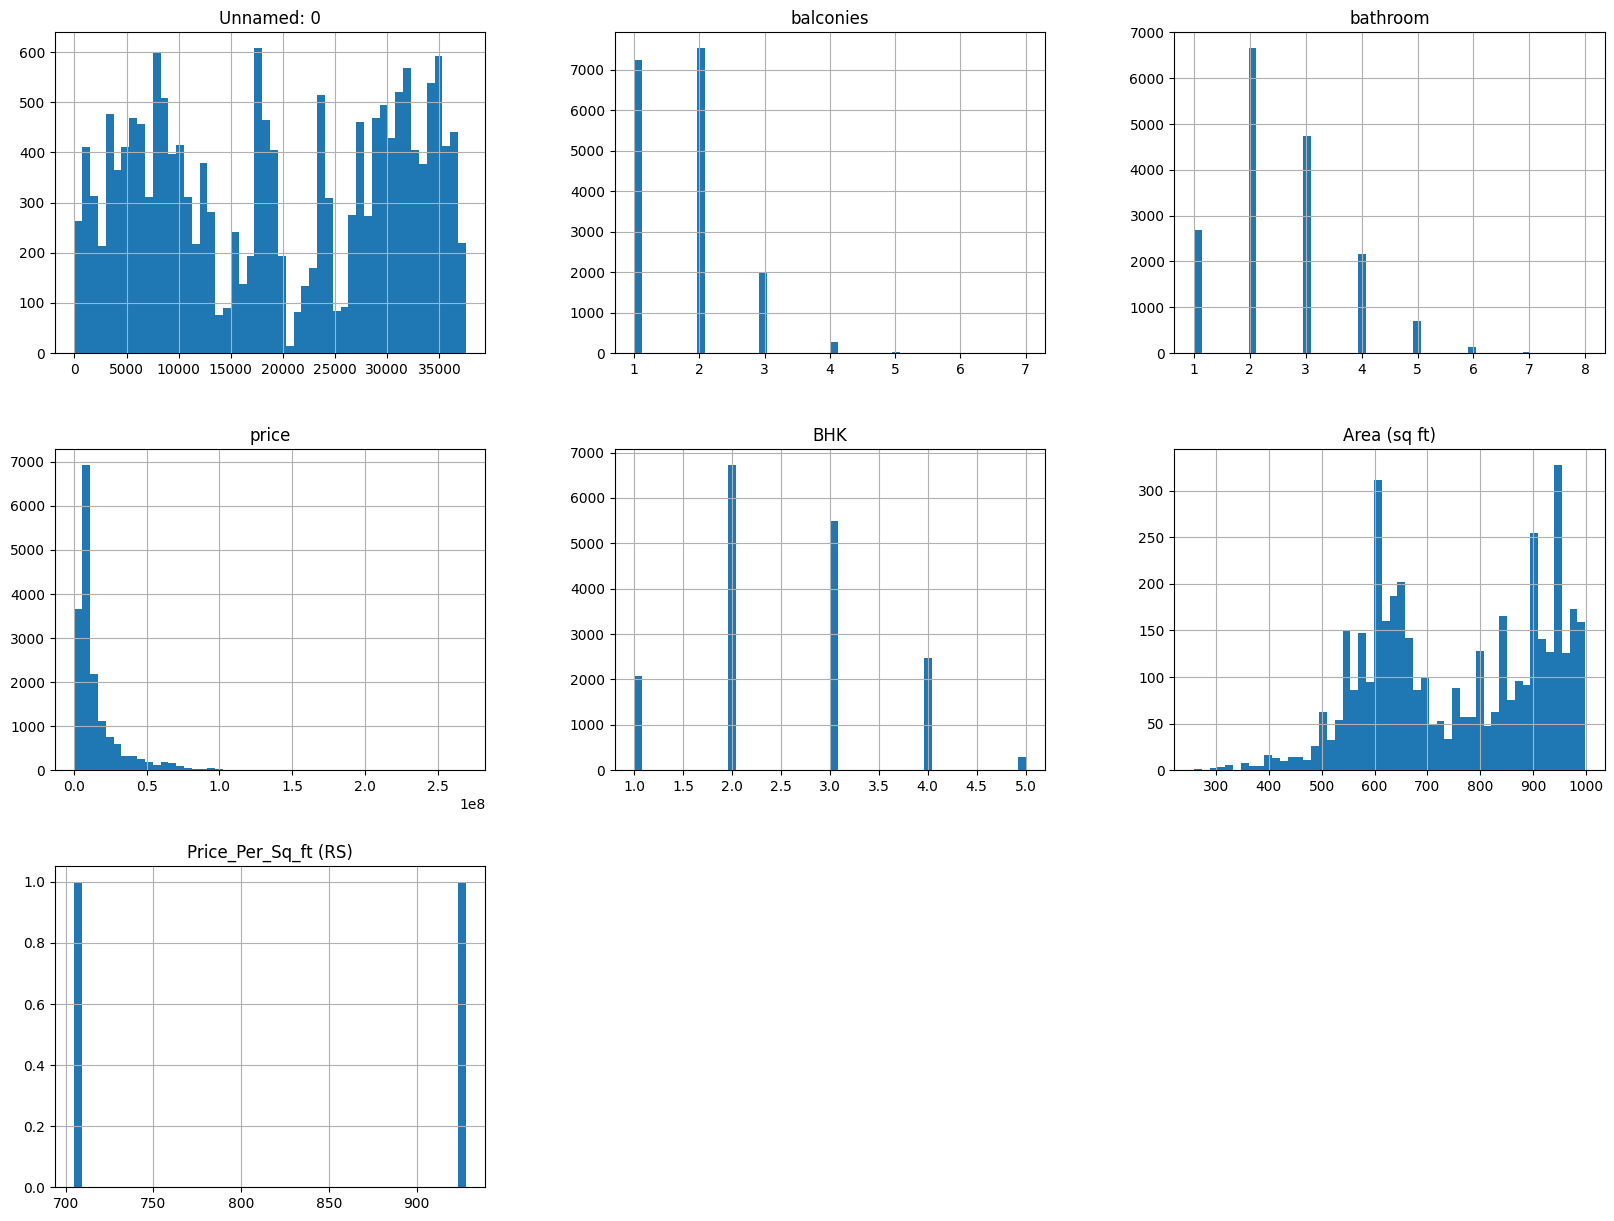

In [26]:
p5.hist(bins=50,figsize=(20,15))
plt.show()

Train-Test Splitting

In [27]:
import numpy as np

For Learning Purposes 

In [28]:
'''
def split_train_test(data,test_ratio):
    np.random.seed(42)
    #we used seed to prevent the random to take the data from test set, do randomness in trainset only
    shuffled=np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled[:test_set_size]
    train_indices=shuffled[test_set_size:]
    #iloc=integer location
    return data.iloc[train_indices], data.iloc[test_indices]
'''

'\ndef split_train_test(data,test_ratio):\n    np.random.seed(42)\n    #we used seed to prevent the random to take the data from test set, do randomness in trainset only\n    shuffled=np.random.permutation(len(data))\n    test_set_size=int(len(data)*test_ratio)\n    test_indices=shuffled[:test_set_size]\n    train_indices=shuffled[test_set_size:]\n    #iloc=integer location\n    return data.iloc[train_indices], data.iloc[test_indices]\n'

In [29]:
#train_set, test_set=split_train_test(p5,0.2)

In [30]:
#print("Rows in Train set :", len(train_set))
#print("Rows in Test set :", len(test_set))

For Actual Model test we used Sklearn

In [31]:
#from sklearn.model_selection import train_test_split
#train_set, test_set, = train_test_split(p5,test_size=0.2,random_state=42)


In [32]:
#print("Rows in Train set :", len(train_set))
#print("Rows in Test set :", len(test_set))

In [33]:
'''
from sklearn.model_selection import StratifiedShuffleSplit
split= StratifiedShuffleSplit(n_splits=5,test_size=0.2,random_state=42)
for train_index, test_index in split.split(p5,p5["BHK"]):
    split_train_set=p5.loc[train_index]
    split_test_set= p5.loc[test_index]
'''


'\nfrom sklearn.model_selection import StratifiedShuffleSplit\nsplit= StratifiedShuffleSplit(n_splits=5,test_size=0.2,random_state=42)\nfor train_index, test_index in split.split(p5,p5["BHK"]):\n    split_train_set=p5.loc[train_index]\n    split_test_set= p5.loc[test_index]\n'

In [46]:
p6=p5[['balconies','bathroom','price','BHK','Area (sq ft)','Price_Per_Sq_ft (RS)']].copy()
p6.head()

,balconies,bathroom,price,BHK,Area (sq ft),Price_Per_Sq_ft (RS)
0,2,3,27000000,3,"1,611","16,759"
4,1,3,29002000,3,"1,706","17,000"
5,2,2,4720765,2,"1,015","4,651"
8,2,3,24000000,3,"1,650","14,545"
9,1,1,2783351,1,449,"6,199"


In [47]:
p6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17076 entries, 0 to 37538
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   balconies             17076 non-null  object
 1   bathroom              17076 non-null  object
 2   price                 17076 non-null  object
 3   BHK                   17076 non-null  object
 4   Area (sq ft)          17076 non-null  object
 5   Price_Per_Sq_ft (RS)  17076 non-null  object
dtypes: object(6)
memory usage: 933.8+ KB


In [36]:
#numeric_col=['price','balconies','bathroom','BHK','Area (sq ft)','Price_Per_Sq_ft (RS)']
#p6[numeric_col]=p6[numeric_col].apply(pd.to_numeric, errors='coerce')

In [48]:
p6['Price_Per_Sq_ft (RS)'].value_counts()

Price_Per_Sq_ft (RS)
10,000    224
6,666     164
6,000     117
5,000     109
7,500      94
         ... 
15,082      1
9,211       1
12,450      1
10,676      1
10,501      1
Name: count, Length: 4817, dtype: int64

In [49]:
p6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17076 entries, 0 to 37538
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   balconies             17076 non-null  object
 1   bathroom              17076 non-null  object
 2   price                 17076 non-null  object
 3   BHK                   17076 non-null  object
 4   Area (sq ft)          17076 non-null  object
 5   Price_Per_Sq_ft (RS)  17076 non-null  object
dtypes: object(6)
memory usage: 933.8+ KB


In [50]:
p6.describe()

,balconies,bathroom,price,BHK,Area (sq ft),Price_Per_Sq_ft (RS)
count,17076,17076,17076,17076,17076,17076
unique,7,8,1396,5,1778,4817
top,2,2,7000000,2,"1,100","10,000"
freq,7544,6667,464,6733,311,224


In [51]:
#p6.plot(kind='scatter',x='BHK',y='balconies',alpha=0.1)

In [52]:
p6['Area (sq ft)'] = p6['Area (sq ft)'].str.replace(',', '').astype(int)
p6['Price_Per_Sq_ft (RS)'] = p6['Price_Per_Sq_ft (RS)'].str.replace(',','').astype(int)

p6.head()


,balconies,bathroom,price,BHK,Area (sq ft),Price_Per_Sq_ft (RS)
0,2,3,27000000,3,1611,16759
4,1,3,29002000,3,1706,17000
5,2,2,4720765,2,1015,4651
8,2,3,24000000,3,1650,14545
9,1,1,2783351,1,449,6199


In [53]:
p7=p6.copy()
p8=p7.copy()
p8['location']=p5[['locality']].copy()
p7.head()

,balconies,bathroom,price,BHK,Area (sq ft),Price_Per_Sq_ft (RS)
0,2,3,27000000,3,1611,16759
4,1,3,29002000,3,1706,17000
5,2,2,4720765,2,1015,4651
8,2,3,24000000,3,1650,14545
9,1,1,2783351,1,449,6199


In [54]:
p8.head()

,balconies,bathroom,price,BHK,Area (sq ft),Price_Per_Sq_ft (RS),location
0,2,3,27000000,3,1611,16759,Deccan Gymkhana
4,1,3,29002000,3,1706,17000,Deccan Gymkhana
5,2,2,4720765,2,1015,4651,Mundhwa
8,2,3,24000000,3,1650,14545,Law collage Road
9,1,1,2783351,1,449,6199,Mahalunge


In [55]:
p9=p8.drop(['Price_Per_Sq_ft (RS)'],axis='columns')
p9.head()

,balconies,bathroom,price,BHK,Area (sq ft),location
0,2,3,27000000,3,1611,Deccan Gymkhana
4,1,3,29002000,3,1706,Deccan Gymkhana
5,2,2,4720765,2,1015,Mundhwa
8,2,3,24000000,3,1650,Law collage Road
9,1,1,2783351,1,449,Mahalunge


In [56]:
p9['location'].value_counts(ascending=True)

location
Manik Bagh                       1
Aditya Birla Hospital Marg       1
Talegaon                         1
bibvewadi                        1
Ghodegaon                        1
                              ... 
Baner                         1030
Koregaon Park                 1085
Kalyani Nagar                 1399
Viman Nagar                   1419
Kharadi                       1807
Name: count, Length: 342, dtype: int64

In [57]:
area_counts = p9['location'].value_counts()
area_stats_less_than_10 = area_counts[area_counts < 10].index.tolist()

p9.loc[:,'location']=p9.location.apply(lambda x: 'other' if x in area_stats_less_than_10 else x)

In [58]:
p9['location'].value_counts(ascending=True)

location
Kale Padal             10
Hinjewadi Phase 1      10
Pimpri                 10
Mukund Nagar           10
Chakan                 10
                     ... 
Baner                1030
Koregaon Park        1085
Kalyani Nagar        1399
Viman Nagar          1419
Kharadi              1807
Name: count, Length: 96, dtype: int64

In [59]:
temp=pd.get_dummies(p9.location)
temp=temp.astype(int)
temp.head()

,Ambegaon Budruk,Ashok Nagar,Aundh,Balewadi,Baner,Baner Pashan Link Road,Baner Road,Bavdhan,Bhugaon,Bibwewadi,...,Vishrantwadi,Wadgaon Sheri,Wagholi,Wakad,Wanowrie,Wanwadi,Warje,Yerawada,katraj kondhwa road,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
p10=pd.concat([p9,temp.drop(['other'],axis='columns')])
p10=p10.fillna(0)
p10.head()


,balconies,bathroom,price,BHK,Area (sq ft),location,Ambegaon Budruk,Ashok Nagar,Aundh,Balewadi,...,Viman Nagar,Vishrantwadi,Wadgaon Sheri,Wagholi,Wakad,Wanowrie,Wanwadi,Warje,Yerawada,katraj kondhwa road
0,2,3,27000000,3,1611.0,Deccan Gymkhana,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,3,29002000,3,1706.0,Deccan Gymkhana,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2,2,4720765,2,1015.0,Mundhwa,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2,3,24000000,3,1650.0,Law collage Road,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1,1,2783351,1,449.0,Mahalunge,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
p11=p10.drop(['location'],axis='columns')
p11.head()

,balconies,bathroom,price,BHK,Area (sq ft),Ambegaon Budruk,Ashok Nagar,Aundh,Balewadi,Baner,...,Viman Nagar,Vishrantwadi,Wadgaon Sheri,Wagholi,Wakad,Wanowrie,Wanwadi,Warje,Yerawada,katraj kondhwa road
0,2,3,27000000,3,1611.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,3,29002000,3,1706.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2,2,4720765,2,1015.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2,3,24000000,3,1650.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1,1,2783351,1,449.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
x=p11.drop('price',axis='columns')
x.head()

,balconies,bathroom,BHK,Area (sq ft),Ambegaon Budruk,Ashok Nagar,Aundh,Balewadi,Baner,Baner Pashan Link Road,...,Viman Nagar,Vishrantwadi,Wadgaon Sheri,Wagholi,Wakad,Wanowrie,Wanwadi,Warje,Yerawada,katraj kondhwa road
0,2,3,3,1611.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,3,3,1706.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2,2,2,1015.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2,3,3,1650.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1,1,1,449.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
y=p11.price
y.head()

0    27000000
4    29002000
5     4720765
8    24000000
9     2783351
Name: price, dtype: object

In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [65]:
from sklearn.linear_model import LinearRegression
lc= LinearRegression()
lc.fit(x_train,y_train)
lc.score(x_test,y_test)


0.8286191016811694

In [66]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=42)
cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.8286191 , 0.82873331, 0.83840342, 0.82382681, 0.84369915])

In [67]:
x.columns

Index(['balconies', 'bathroom', 'BHK', 'Area (sq ft)', 'Ambegaon Budruk',
       'Ashok Nagar', 'Aundh', 'Balewadi', 'Baner', 'Baner Pashan Link Road',
       'Baner Road', 'Bavdhan', 'Bhugaon', 'Bibwewadi', 'Boat Club Road',
       'Bund Garden', 'Chakan', 'Chikhali', 'Chinchwad', 'Deccan Gymkhana',
       'Dhanori', 'Dhayari', 'Dhayari Phata', 'Dhole Patil Road', 'Erandwane',
       'Fatima Nagar', 'Gahunje', 'Hadapsar', 'Handewadi', 'Handewadi Road',
       'Hinjewadi', 'Hinjewadi Phase 1', 'Hinjewadi Phase 2', 'Kale Padal',
       'Kalyani Nagar', 'Karve Nagar', 'Kasarwadi', 'Katraj', 'Keshav Nagar',
       'Kharadi', 'Kondhwa', 'Kondhwa Budruk', 'Koregaon Park', 'Kothrud',
       'Law collage Road', 'Lohegaon', 'Lulla Nagar', 'Magarpatta',
       'Mahalunge', 'Manjari', 'Market yard', 'Model Colony', 'Mohamadwadi',
       'Moshi', 'Mukund Nagar', 'Mumbai Pune Highway', 'Mundhwa', 'NIBM',
       'NIBM Annex Mohammadwadi', 'NIBM Annexe', 'NIBM Road', 'Narhe',
       'Pashan', 'Pasha

We can use gridsearchcv to find the best model for training, here, linear regression is best as it gaev good results.

In [68]:
def predict_price(location,balconies,bathroom,BHK,area):
    loc_index=np.where(x.columns==location)[0][0]
    q=np.zeros(len(x.columns))
    q[0]=balconies
    q[1]=bathroom
    q[2]=BHK
    q[3]=area
    if loc_index>=0:
        q[loc_index]=1
    return lc.predict([q])[0]

In [69]:
predict_price('Warje',2,2,2,1500)

c:\Users\hasna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


16819256.609920155

In [70]:
predict_price('Viman Nagar',1,1,1,750)

c:\Users\hasna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


8409628.304960985

In [71]:
import pickle
with open('Pune_property_data.pickle','wb') as f:
    pickle.dump(lc,f)


In [72]:
import json
columns={'data_column':[col.lower() for col in x.columns]}
f=open("columns.json","w")
f.write(json.dumps(columns))

1438